In [2]:
import dpdata
import numpy as np
from deepmd.infer import DeepPot
import matplotlib.pyplot as plt 

In [3]:
dp = DeepPot('frozen_model.pb')

2022-07-07 10:20:44.847667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13418 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0
2022-07-07 10:20:44.879004: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13418 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


2022-07-07 10:22:31.975697: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.34GiB (rounded to 2510438400)requested by op load/filter_type_1/MatMul_6
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-07 10:22:31.975752: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2022-07-07 10:22:31.975764: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 13, Chunks in use: 13. 3.2KiB allocated for chunks. 3.2KiB in use in bin. 1.3KiB client-requested in use in bin.
2022-07-07 10:22:31.975772: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 20, Chunks in use: 20. 14.0KiB allocated for chunks. 14.0KiB in use in bin. 11.2KiB client-requested in use in bin.
2022-07-07 1

2022-07-07 10:22:41.977283: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.34GiB (rounded to 2510438400)requested by op load/filter_type_1/concat_3
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-07 10:22:41.977335: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2022-07-07 10:22:41.977346: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 13, Chunks in use: 13. 3.2KiB allocated for chunks. 3.2KiB in use in bin. 1.3KiB client-requested in use in bin.
2022-07-07 10:22:41.977355: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 20, Chunks in use: 20. 14.0KiB allocated for chunks. 14.0KiB in use in bin. 11.2KiB client-requested in use in bin.
2022-07-07 1

2022-07-07 10:22:51.978366: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.17GiB (rounded to 1255219200)requested by op load/filter_type_0/concat_3
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-07 10:22:51.978420: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2022-07-07 10:22:51.978432: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 13, Chunks in use: 13. 3.2KiB allocated for chunks. 3.2KiB in use in bin. 1.3KiB client-requested in use in bin.
2022-07-07 10:22:51.978440: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 20, Chunks in use: 20. 14.0KiB allocated for chunks. 14.0KiB in use in bin. 11.2KiB client-requested in use in bin.
2022-07-07 1

2022-07-07 10:23:01.979397: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 798.05MiB (rounded to 836812800)requested by op load/filter_type_0/MatMul_2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-07 10:23:01.979447: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2022-07-07 10:23:01.979459: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 13, Chunks in use: 13. 3.2KiB allocated for chunks. 3.2KiB in use in bin. 1.3KiB client-requested in use in bin.
2022-07-07 10:23:01.979467: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 20, Chunks in use: 20. 14.0KiB allocated for chunks. 14.0KiB in use in bin. 11.2KiB client-requested in use in bin.
2022-07-07 

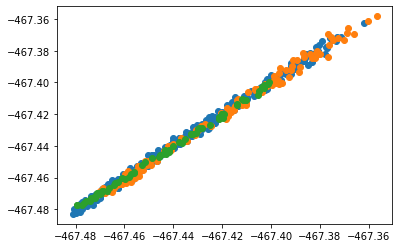

In [6]:
system = dpdata.LabeledSystem('../TrainingData/ice-and-liquid', fmt = 'deepmd/raw')
e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
energy_model = e.reshape([-1]) 
energy_dft=np.genfromtxt("../TrainingData/ice-and-liquid/energy.raw")
number_of_molecules=96
plt.scatter(energy_model/number_of_molecules,energy_dft/number_of_molecules)

system = dpdata.LabeledSystem('../TrainingData/liquid-water-1', fmt = 'deepmd/raw')
e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
energy_model = e.reshape([-1]) 
energy_dft=np.genfromtxt("../TrainingData/liquid-water-1/energy.raw")
number_of_molecules=64
plt.scatter(energy_model/number_of_molecules,energy_dft/number_of_molecules)

system = dpdata.LabeledSystem('../TrainingData/liquid-water-2', fmt = 'deepmd/raw')
e, f, v = dp.eval(system['coords'], system['cells'], system['atom_types'])
energy_model = e.reshape([-1]) 
energy_dft=np.genfromtxt("../TrainingData/liquid-water-2/energy.raw")
number_of_molecules=288
plt.scatter(energy_model/number_of_molecules,energy_dft/number_of_molecules)

plt.show()